In [ ]:
sudo apt-get install -y ffmpeg

In [1]:
import tensorflow as tf
import tensorflow_hub as hub

import requests
import numpy as np

from typing import Generator, Iterable, List, Optional
import mediapy as media

In [2]:
model = hub.load("https://tfhub.dev/google/film/1")

In [3]:
_UINT8_MAX_F = float(np.iinfo(np.uint8).max)

def load_image(img_url: str):
  """Returns an image with shape [height, width, num_channels], with pixels in [0..1] range, and type np.float32."""

  if (img_url.startswith("https")):
    user_agent = {'User-agent': 'Colab Sample (https://tensorflow.org)'}
    response = requests.get(img_url, headers=user_agent)
    image_data = response.content
  else:
    image_data = tf.io.read_file(img_url)

  image = tf.io.decode_image(image_data, channels=3)
  image_numpy = tf.cast(image, dtype=tf.float32).numpy()
  return image_numpy / _UINT8_MAX_F

In [4]:
# using images from the FILM repository (https://github.com/google-research/frame-interpolation/)

image_1_url = "https://github.com/google-research/frame-interpolation/blob/main/photos/one.png?raw=true"
image_2_url = "https://github.com/google-research/frame-interpolation/blob/main/photos/two.png?raw=true"

time = np.array([0.5], dtype=np.float32)

image1 = load_image(image_1_url)
image2 = load_image(image_2_url)

In [5]:
input = {
    'time': np.expand_dims(time, axis=0), # adding the batch dimension to the time
     'x0': np.expand_dims(image1, axis=0), # adding the batch dimension to the image
     'x1': np.expand_dims(image2, axis=0)  # adding the batch dimension to the image
}
mid_frame = model(input)

In [6]:
print(mid_frame.keys())

dict_keys(['backward_flow_pyramid', 'backward_residual_flow_pyramid', 'forward_flow_pyramid', 'forward_residual_flow_pyramid', 'image', 'x0_warped', 'x1_warped'])


input image one,generated image,input image two

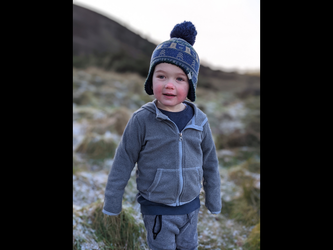
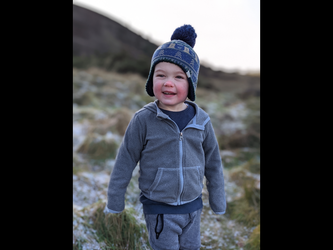
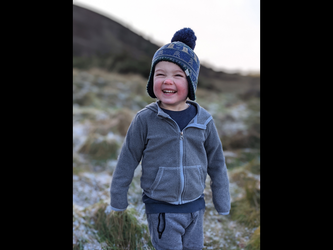

In [7]:
frames = [image1, mid_frame['image'][0].numpy(), image2]

media.show_images(frames, titles=['input image one', 'generated image', 'input image two'], height=250)